Project for module 3, CAS Applied Data Science, 2021-03-12, P. Meyer, F. Fürst, P. Hurni University of Bern.

<a name="title"></a>
***
# Butterfly Classification
***


### Contents

**[1. Introduction](#intro)**

**[2. Load libraries](#loadlibraries)**     
  
**[3. Load data](#loaddata)**

  * [3.1 Load images (x)](#loadimages)
  * [3.2 Generate labels (y)](#generatelabels)
  * [3.3 Having a quick look at the data](#quicklook)

**[4. Label encoding and one hot encoding ](#labelencoding)**

**[5. Train-Test-Split](#traintest)**
  
**[6. Building a model](#buildmodel)**

**[7. Data Augmentation](#dataaugmentation)**

**[8. Train the model](#trainmodel)**

**[9. Test trained model](#test)**

   * [9.1 Test trained model on an image from the test set](#testtest)
   * [9.2 Test trained model on an image from the internet](#testinternet)
 
       * [9.2.1 Loading trained model (weights)](#loadsavedweights)
       * [9.2.2 Upload image and test the model](#testnewimage)

**[10. Conclusion and Discussion](#conclusion)**


***

<a name="intro"></a>
# 1. Introduction

Goal of project: Apply supervised machine learning.
Chosen project: Classification of butterfly-images.

**Preparation**
- Download Dataset from http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip
- Unzip and save images into folder: "./leedsbutterfly/images"

**Libraries used**
- numpy for array-handeling
- pandas for define dataframes
- scipy for handeling sparse matrices 
- matplotlib for previews and graphs
- os for filelocation navigation and manipulation
- glob for filelocation navigation and manipulation
- PIL to read and manipulate images 
- sklearn for machine-learning preparation (label- and one-hot encoding, train-test-split)
- tensorflow for machine-learning 
- random for randomized loading of images
- simple_image_download for downloading Google images

<a name="loadlibraries"></a>
# 2. Load libraries

In [1]:
import glob
import matplotlib.pyplot as plt
# only in a Jupyter Notebook
%matplotlib inline
import numpy as np
import os
import pandas as pd
from PIL import Image
import random
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

<a name="loaddata"></a>
# 3. Load data

<a name="loadimages"></a>
## 3.1 Load images (x)

Targets: 
- Load all images from folder into a numpy array  with shape 
  - [0]: Number of images, 
  - [1]: pixel: rows/image width  
  - [2]: pixel:  coloumns/image height 
  - [3]: channels: RGB.
- Create variables for later use

Libraries: 
- glob 
- PIL.Image

For more information: See https://pillow.readthedocs.io/en/stable/reference/Image.html

In [2]:
x = [] # array of all images
for img in glob.glob("./leedsbutterfly/images/*.png"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    x.append(np.array(size_image))

x = np.array(x)

In [3]:
print(f"x is a {type(x)} containing \n   {x.shape[0]} images with \n   {x.shape[1]}*{x.shape[2]} resolution and \n   {x.shape[3]} channels (i.e. RGB).")

x is a <class 'numpy.ndarray'> containing 
   832 images with 
   128*128 resolution and 
   3 channels (i.e. RGB).


In [4]:
# Create variables for later use
image_width = x.shape[1]
image_height = x.shape[2]
image_channels = x.shape[3]
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Image channels: {image_channels}")

Image width: 128
Image height: 128
Image channels: 3


<a name="generatelabels"></a>
## 3.2 Generate labels (y)

Targets:
- Generate labels from filenames
- Create an array with categories  from filenames for supervised learning
- Create a dictionary with labels from ("./leedsbutterfly/descriptions/")
- Check results 

Libraries:
- pandas
- os


In [5]:
categories = []
filenames = os.listdir("./leedsbutterfly/images/")
for filename in filenames:
        category = filename.split(".")[0]
        categories.append(category[0:3])

In [6]:
categories[0:10]

['001', '001', '001', '001', '001', '001', '001', '001', '001', '001']

In [7]:
df = pd.DataFrame({
    'Filename' : filenames,
    'Category' : categories
})
df.head()

,Filename,Category
0,0010001.png,001
1,0010002.png,001
2,0010004.png,001
3,0010005.png,001
4,0010006.png,001


In [8]:
# Get labels from textfiles
dictLabel = {}
labels = os.listdir("./leedsbutterfly/descriptions/")
for label in labels:
    with open('./leedsbutterfly/descriptions/'+label) as t:
        # name = t.read().splitlines()[0] # or [1] for english name
        name = t.readlines()[0].rstrip('\n') 
        label = label.rstrip('.txt')
        dictLabel[label] = name
        
dictLabel

{'001': 'Danaus plexippus',
 '002': 'Heliconius charitonius',
 '003': 'Heliconius erato',
 '004': 'Junonia coenia',
 '005': 'Lycaena phlaeas',
 '006': 'Nymphalis antiopa',
 '007': 'Papilio cresphontes',
 '008': 'Pieris rapae',
 '009': 'Vanessa atalanta',
 '010': 'Vanessa cardui'}

In [9]:
df['Category'] = df['Category'].replace(dictLabel) 
df.head()

,Filename,Category
0,0010001.png,Danaus plexippus
1,0010002.png,Danaus plexippus
2,0010004.png,Danaus plexippus
3,0010005.png,Danaus plexippus
4,0010006.png,Danaus plexippus


<a name="quicklook"></a>
## 3.3 Having a quick look at the data


Targets:
- Overview of images according to categories: 
  - count number of images per category
  - plot

- Display examples
  - identify first example of butterfly categories in dataset
  - plot

Libraries:
- pandas
- matplotlib
- numpy

In [10]:
print("Number of images per category in dataset")
df['Category'].value_counts()

Number of images per category in dataset


Nymphalis antiopa         100
Heliconius charitonius     93
Junonia coenia             90
Vanessa atalanta           90
Papilio cresphontes        89
Lycaena phlaeas            88
Vanessa cardui             84
Danaus plexippus           82
Heliconius erato           61
Pieris rapae               55
Name: Category, dtype: int64

Number of images per category in dataset


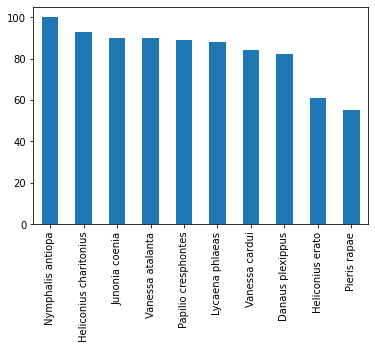

In [11]:
print("Number of images per category in dataset")
df['Category'].value_counts().plot.bar();

In [12]:
# First array contains the (sorted) unique values
# Second array (returned if return_index is set to True) is a list of the indexes of the first occurrences
l = np.unique(df['Category'], return_index=True)
l

(array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
        'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
        'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
        'Vanessa cardui'], dtype=object),
 array([  0,  82, 175, 236, 326, 414, 514, 603, 658, 748], dtype=int64))

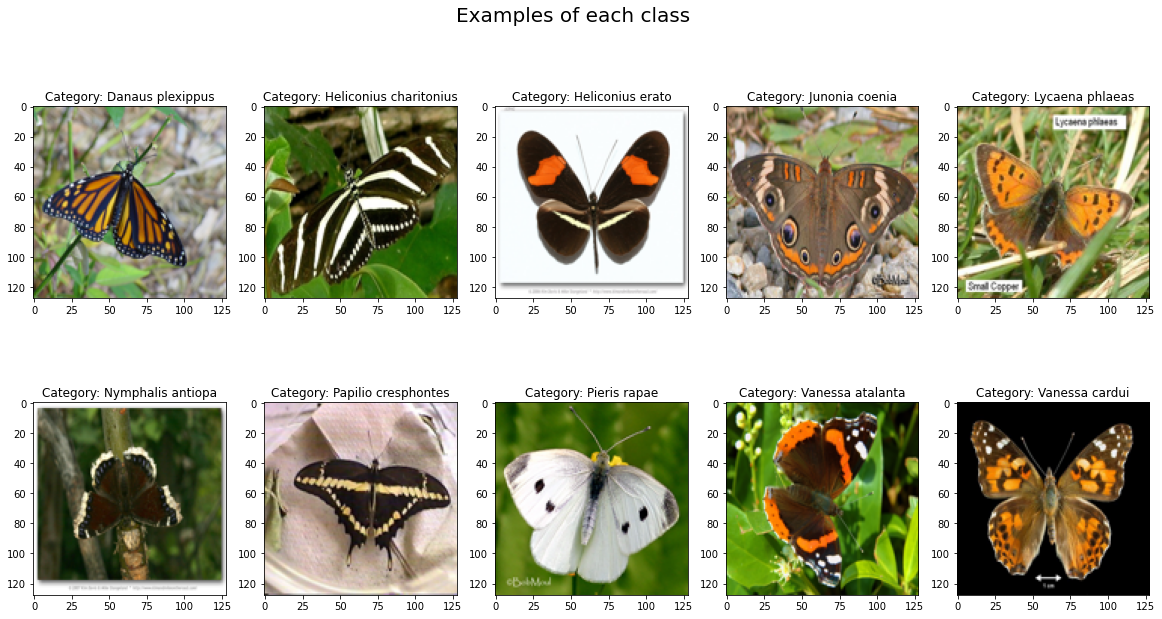

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs) # returns a 1-D array, containing the elements of the input
for i in range(0,10):
        axs[i].imshow(x[l[1][i]])
        axs[i].set_title(f"Category: {l[0][i]}")
fig.suptitle('Examples of each class', fontsize=20)
plt.show()

<a name="labelencoding"></a>
# 4. Label encoding and one hot encoding 

Targets: Define labels appropriate for machine learning 
 - Encoding: Convert Category-values from strings to label numbers  
 - One Hot encoding: convert column with label numbers to a sparse matrix


Libraries:
 - sklearn
  
  
Further reading:
  - https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
  - https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

In [14]:
# Convert Category strings to label numbers

enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])

In [15]:
enc.classes_

array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
       'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
       'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
       'Vanessa cardui'], dtype=object)

In [16]:
df.head()

,Filename,Category
0,0010001.png,0
1,0010002.png,0
2,0010004.png,0
3,0010005.png,0
4,0010006.png,0


In [17]:
y = df['Category'].values
type(y)

numpy.ndarray

In [18]:
print(f"Unique labels are: {np.unique(y)}")

Unique labels are: [0 1 2 3 4 5 6 7 8 9]


In [19]:
y.shape

(832,)

In [20]:
# One Hot encoding: convert column with label numbers to a sparse matrix 
y = y.reshape(len(y),1)
ohe = OneHotEncoder() # Option: sparse=False
y = ohe.fit_transform(y)

In [21]:
print (f"y.shape is {y.shape}. \n  [0]: number of objects, \n  [1]: number of unique labels.\n\n y is of type {type(y)}")

y.shape is (832, 10). 
  [0]: number of objects, 
  [1]: number of unique labels.

 y is of type <class 'scipy.sparse.csr.csr_matrix'>


In [22]:
type(y)

scipy.sparse.csr.csr_matrix

In [23]:
# If the type of y is a 'scipy.sparse.csr.csr_matrix', then calling tf.keras.models.Sequential().fit() will raise an error:
# ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'scipy.sparse.csr.csr_matrix'>

# Transform sparse matrix into a (dense) numpy array.
if isinstance(y, scipy.sparse.csr.csr_matrix):
    y = y.toarray()
     
print(f"Type of y is now: {type(y)}")

Type of y is now: <class 'numpy.ndarray'>


In [24]:
print(f"x.dtype is {x.dtype}, y.dtype is {y.dtype}") 

x.dtype is uint8, y.dtype is float64


<a name="traintest"></a>
# 5. Train-Test-Split

Target
- split data into two groups: training and test
  - apply split to the images (x) and the corresponding unique labels (y)

Libraries
- from sklearn.model_selection: train_test_split


Further reading, see https://realpython.com/train-test-split-python-data/

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
print(f"Shape of x_train: {x_train.shape}") 
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (665, 128, 128, 3)
Shape of x_test: (167, 128, 128, 3)
Shape of y_train: (665, 10)
Shape of y_test: (167, 10)


<a name="buildmodel"></a>
# 6. Building the model

Target: Define the model with layers to generate tensors.

Note from ML-Winter-School:

    In feature learning tasks, usually multiple convolutional layers followed by a pooling layer, and fully/densely connected layers in the last few layers are used.

Library
- tensorflow.keras

Further reading: https://keras.io

For our model, we mostly use the rectified linear activation function (ReLu) for the following general reasons:

- Once standard functions, Sigmoid and hyperbolic tangent activation functions cannot be used in a model with many layers due to the vanishing gradient problem (error gradient created by each layer will become too small to improve the model).
- ReLu does not suffer from the vanishing gradient problem.
- ReLu is computationally very simple and does not need a lot of ressources compared to other activation functions.
- ReLu acts mostly like a linear activation function, making it easier to optimize.
- It has become the standard activation function and is a good function for most models.

In [27]:
print(tf.__version__)

2.3.0


We will now build a *Deep Convolutional Neural Network*:

In [28]:
model = tf.keras.models.Sequential()

# Some convolutional layers followed by pooling layers for reducing the dimension to decrease memory

# Conv2D: filters = dimensionality of the output space; kernel_size = height and width of the 2D convolution window
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation = 'relu', input_shape=(image_width, image_height, image_channels)))
# MaxPooling2D: pool_size = window size over which to take the maximum
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Reduces the number of dimensions
model.add(tf.keras.layers.Flatten())

# Dropout layer randomly sets input units to 0 with a frequency of rate
# at each step during training time, which helps prevent overfitting.
model.add(tf.keras.layers.Dropout(rate=0.4))

# Fully connected layer
# units = dimensionality of the output space
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Normalize output between 0 and 1 with softmax activation function
# Activation Function: softmax for multiple class, sigmoid for binary class
model.add(tf.keras.layers.Dense(10, activation='softmax'))



# Adam: Efficient stochastic gradient descent method
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), #0.0005
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

<a name="dataaugmentation"></a>
# 7. Data Augmentation

Targets:
- Rotate and rescale images to augment the data
- Verify data augmentation

Library:
- tf.keras

Further reading:
- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
- https://keras.io/api/preprocessing/image/
- https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

In [30]:
# Create augmented image generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

# fit parameters from data
datagen.fit(x_train)

In [31]:
# choose image id for plotting
id = 0
x_train[id:id+1].shape, y_train[id:id+1].shape

((1, 128, 128, 3), (1, 10))

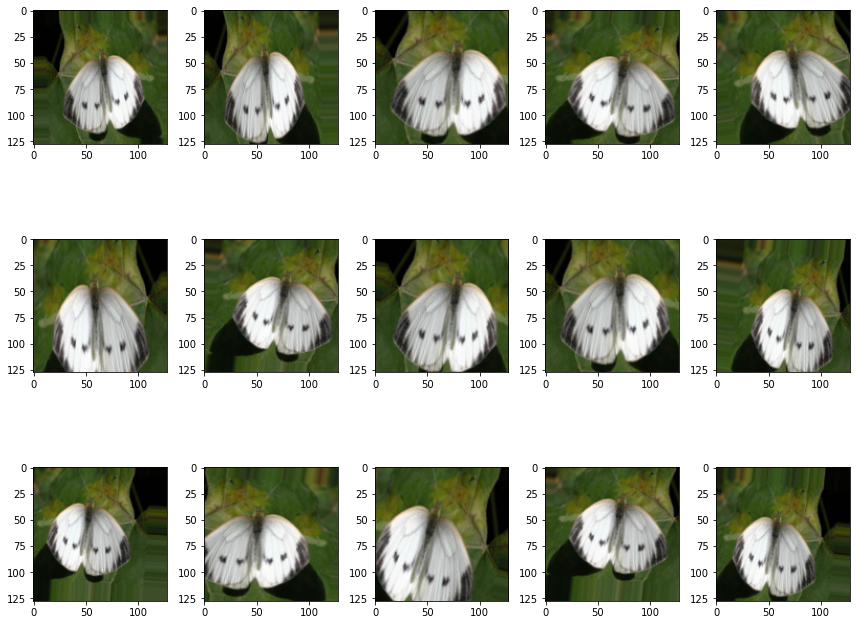

In [32]:
# Plot augmented examples
example_generator = datagen.flow(x_train[id:id+1], y_train[id:id+1])
plt.figure(figsize=(12, 10))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<a name="trainmodel"></a>
# 8. Train the model

Targets:
- Run model
- Save modell and weights for (potential) future use
- Review training loss and accuracy

Libraries:
- tf.keras
- matplotlib

Further reading:
- How to choose the batch size: https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu


**Warning**: `model.fit` does NOT reinitialize trainable variables. Every time it continues from the previous state.

In [33]:
## Load weights before continuing training
# model.load_weights('save/butterfly_32.ckpt')

In [34]:
# Save the state of the trainable variables after each epoch.
save_path = 'saved_weights/butterfly_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

In [35]:
epochs = 60
batch_size = 128 #32, 64, 128, 256

# False: train the model with the original data
# True: train the model with the augmented data
aug =  False # True

if aug == True:
    # Fits the model on batches with real-time data augmentation:
    hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                 epochs = epochs,
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

else:
    # Fits the model with the original data
    hist = model.fit(x = x_train,
                 y = y_train,
                 epochs = epochs,
                 batch_size = batch_size, 
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

Epoch 1/60
6/6 [==============================] - 7s 1s/step - loss: 10.8098 - accuracy: 0.1398 - val_loss: 2.4644 - val_accuracy: 0.1437
Epoch 2/60
6/6 [==============================] - 7s 1s/step - loss: 2.4058 - accuracy: 0.1414 - val_loss: 2.2157 - val_accuracy: 0.2036
Epoch 3/60
6/6 [==============================] - 8s 1s/step - loss: 2.2173 - accuracy: 0.1865 - val_loss: 2.0742 - val_accuracy: 0.2455
Epoch 4/60
6/6 [==============================] - 10s 2s/step - loss: 2.0459 - accuracy: 0.2541 - val_loss: 1.9332 - val_accuracy: 0.3473
Epoch 5/60
6/6 [==============================] - 9s 1s/step - loss: 1.8842 - accuracy: 0.3459 - val_loss: 1.6977 - val_accuracy: 0.3832
Epoch 6/60
6/6 [==============================] - 8s 1s/step - loss: 1.7487 - accuracy: 0.3278 - val_loss: 1.5928 - val_accuracy: 0.3892
Epoch 7/60
6/6 [==============================] - 6s 1s/step - loss: 1.6072 - accuracy: 0.4105 - val_loss: 1.4817 - val_accuracy: 0.4251
Epoch 8/60
6/6 [=======================

6/6 [==============================] - 8s 1s/step - loss: 0.0380 - accuracy: 0.9865 - val_loss: 0.6139 - val_accuracy: 0.8323


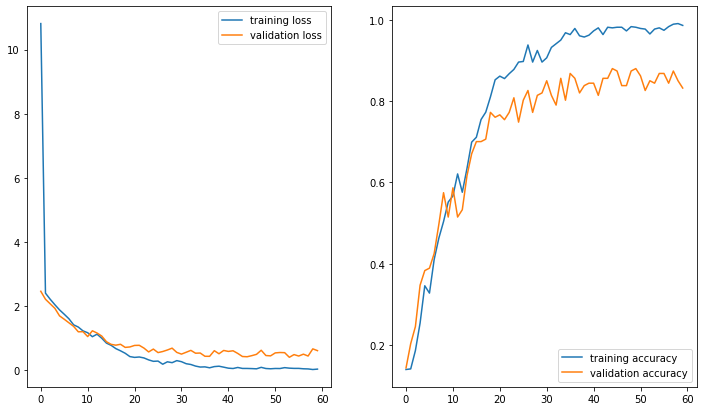

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,7))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [37]:
# Compare how the current model performs on the test dataset:
model.evaluate(x_test,  y_test, verbose=2)

6/6 - 1s - loss: 0.6139 - accuracy: 0.8323


[0.6139327883720398, 0.832335352897644]

<a name="test"></a>
# 9. Test trained model

Targets:
- Test trained model on an image from the dataset
- Test trained model on an image from the internet

Libraries:
- tf.keras
- numpy
- matplotlib

<a name="testtest"></a>
## 9.1 Test trained model on an image from the test set

Predicted label: 8 (Vanessa atalanta) with 99.91% confidence
True label: 8 (Vanessa atalanta)


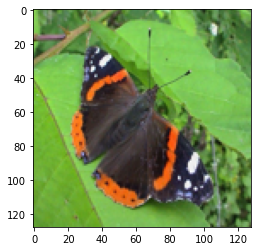

In [38]:
# Choose some random image id
im_id = random.choice(range(x_test.shape[0]))

# Test trained model on image with id = im_id 
y_pred = model.predict(x_test[im_id:im_id+1].astype(float))
# Print the index of the class with the highest predicted probability
print(f'Predicted label: {np.argmax(y_pred)} ({enc.classes_[np.argmax(y_pred)]}) with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
# Print true label
print(f'True label: {np.argmax(y_test[im_id])} ({enc.classes_[np.argmax(y_test[im_id])]})')
plt.imshow(x_test[im_id]);

<a name="testinternet"></a>
## 9.2 Test trained model on an image from the internet

Targets:
- Upload image
- Run model
- Evaluate results

<a name="loadsavedweights"></a>
### 9.2.1 Loading trained model weights

If you want to use only the test scenario without the training, you can load the model and the model weights. These have been saved during the training process. Load them and re-evaluate the model.

See https://www.tensorflow.org/tutorials/keras/save_and_load?hl=en

In [39]:
# Load the previously saved weights from the checkpoint

model.load_weights('saved_weights/butterfly_31.ckpt')

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

6/6 - 1s - loss: 0.5060 - accuracy: 0.8503
Restored model, accuracy: 85.03%


<a name="testnewimage"></a>
### 9.2.2 Upload image and test the model

Targets: 
- Check if our model can classify images downloaded from google images correctly.

- Test what happens if our model tries to classify a car, a house or something similar.

Library:
- simple_image_download

In [52]:
# species = 'Nymphalis antiopa'
first = 'Nymphalis'
second = 'antiopa'
species = first + ' ' + second
path_species = "./simple_images/" + first + '_' + second + "/*.jpeg"

from simple_image_download import simple_image_download as simp

response = simp.simple_image_download

# Google search for variable species, downloads 10 images
# saves them in a newly created (sub)folder ./simple_images/species
response().download(species, 10)

[========================================================================] 100%


In [53]:
# array of all images from the links above
final_test = []
for img in glob.glob(path_species):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    final_test.append(np.array(size_image))

final_test = np.array(final_test)
final_test.shape

(20, 128, 128, 3)

Predicted label: "Nymphalis antiopa" with 99.94% confidence
The model has classified the image correctly.


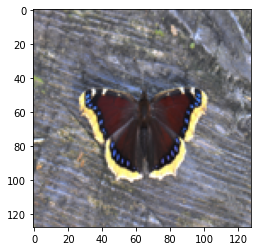

Predicted label: "Vanessa cardui" with 40.68% confidence
The model has misclassified the image.


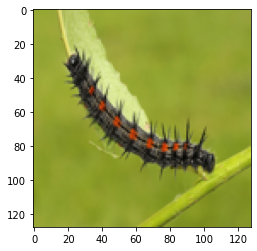

Predicted label: "Vanessa atalanta" with 45.24% confidence
The model has misclassified the image.


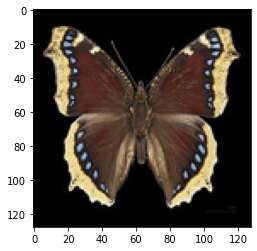

Predicted label: "Nymphalis antiopa" with 63.07% confidence
The model has classified the image correctly.


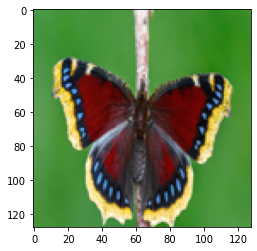

Predicted label: "Nymphalis antiopa" with 99.69% confidence
The model has classified the image correctly.


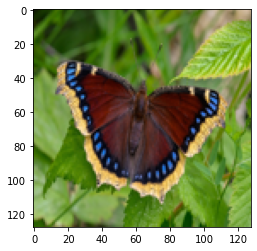

Predicted label: "Pieris rapae" with 99.90% confidence
The model has misclassified the image.


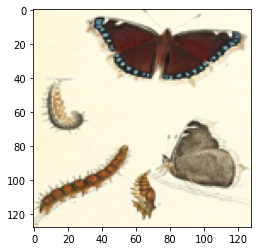

Predicted label: "Nymphalis antiopa" with 89.32% confidence
The model has classified the image correctly.


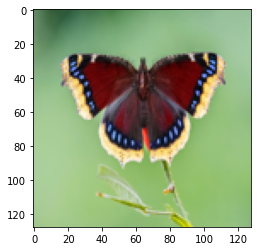

Predicted label: "Nymphalis antiopa" with 95.62% confidence
The model has classified the image correctly.


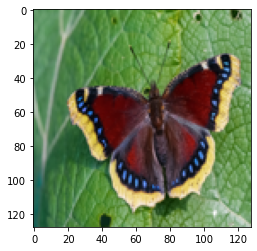

Predicted label: "Nymphalis antiopa" with 99.95% confidence
The model has classified the image correctly.


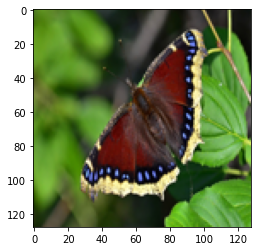

Predicted label: "Nymphalis antiopa" with 99.95% confidence
The model has classified the image correctly.


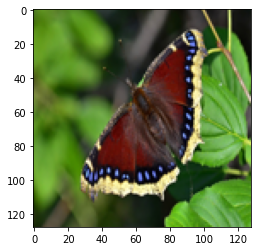

Predicted label: "Nymphalis antiopa" with 99.94% confidence
The model has classified the image correctly.


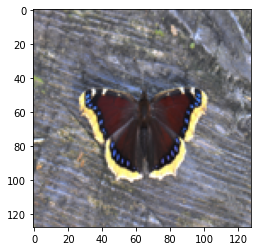

Predicted label: "Nymphalis antiopa" with 99.64% confidence
The model has classified the image correctly.


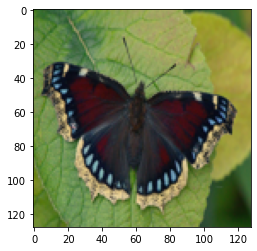

Predicted label: "Vanessa atalanta" with 45.24% confidence
The model has misclassified the image.


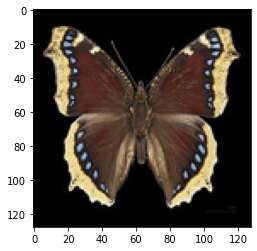

Predicted label: "Nymphalis antiopa" with 99.95% confidence
The model has classified the image correctly.


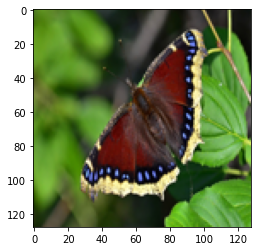

Predicted label: "Nymphalis antiopa" with 99.82% confidence
The model has classified the image correctly.


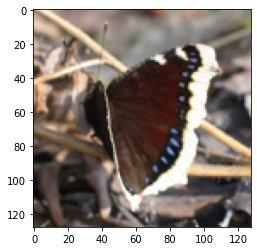

Predicted label: "Nymphalis antiopa" with 68.59% confidence
The model has classified the image correctly.


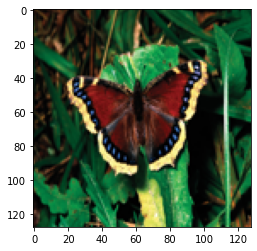

Predicted label: "Vanessa cardui" with 40.68% confidence
The model has misclassified the image.


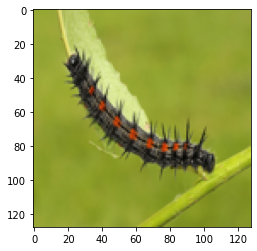

Predicted label: "Nymphalis antiopa" with 96.66% confidence
The model has classified the image correctly.


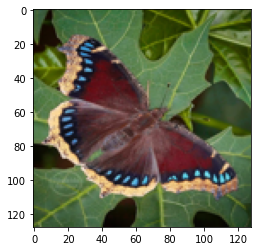

Predicted label: "Nymphalis antiopa" with 99.62% confidence
The model has classified the image correctly.


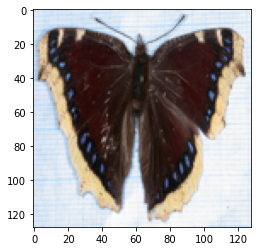

Predicted label: "Nymphalis antiopa" with 99.68% confidence
The model has classified the image correctly.


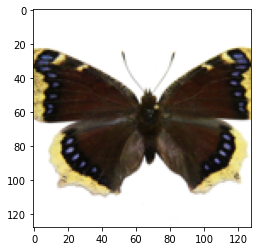

In [54]:
for i in range(len(final_test)):
    # Test trained model on image with id = i
    y_pred = model.predict(final_test[i:i+1].astype(float))
    # Print the index of the class with the highest predicted probability
    print(f'Predicted label: "{enc.classes_[np.argmax(y_pred)]}" with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
    if enc.classes_[np.argmax(y_pred)] == species:
        print(f'The model has classified the image correctly.')
    else:
        print(f'The model has misclassified the image.')
    plt.imshow(final_test[i])
    plt.show();

<a name="conclusion"></a>
# 10. Conclusion and Discussion

**Conclusion**

We have sucessfully created a well working model to identify ten different species of butterflies. After loading the dataset from kaggle, we did some preliminary analysis to get familiar with the butterflies dataset. After labelling and encoding the data, we created an usual 80/20 train-test-split. 

To build our model, we used the tensorflow.keras library. Most of our 14  layers are activated using the ReLu function, a standard function for Neural Networks. We also created additional images through an image data generation function, but did not achieve better results than with our original dataset.

We ran our model through 100 epochs with a batch size of 128 and got a validation accuracy of a bit above 0.9. We then tested our best model on random images downloaded from the internet through Google images and also received mostly correct results.


**Discussion**
- Why does the model not perform better with data augmentation?
- How do we better identify false positives?
- Why does the modell have highly fluctuating validation loss, when data augmentation is enabled?

<center>
Original Data
<img src="./curve original data.png" width=„z.B. 500“ height=„z.B. 500“ >
</center>

<center>
Augmented Data
<img src="./curve augmented data.png" width=„z.B. 500“ height=„z.B. 500“ >
</center>

---
[Back to start](#title)